# Unsupervised Malware Detector of Big Data System Log File

After observation and exploratory analysis of this log file dataset, it doesn't have labels at all.
In order to save human labeling efforts and time, I'd like to use unsupervised clustering method to explore the log file. Kmeans is a widely used clustering method today and I try it in our dataset.
Also, I applied a popular anomaly detection model "Isolation Forest" to detect malicious activity.

Due to malicious activity should only count as a minority of the toal, the final clustering which has only a minority of the total should be malicious attack activity.

This project code is only a initial exploration which is not perfect.

# Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest
df = pd.read_csv('log_file.csv')
df

,id,event_timestamp,proctitle,username,exit,ppid,pid,auid,uid,gid,euid,suid,fsuid,egid,sgid,fsgid
0,1927,2019-06-06 16:18:58+00,curl --fail -sSl http%3A//169.254.169.254/late...,root,0,21831,21832,4294967295,0,0,0,0,0,0,0,0
1,1910,2019-06-06 16:19:40+00,curl --fail -sSL http%3A//169.254.169.254/latest/,root,0,22009,22012,4294967295,0,0,0,0,0,0,0,0
2,1904,2019-06-06 16:19:46+00,curl --fail -sSL http%3A//169.254.169.254/latest/,root,0,13671,13674,4294967295,0,0,0,0,0,0,0,0
3,1905,2019-06-06 16:19:46+00,curl --fail -sSl http%3A//169.254.169.254/late...,root,0,13675,13676,4294967295,0,0,0,0,0,0,0,0
4,1900,2019-06-06 16:19:51+00,curl --fail -sSl http%3A//169.254.169.254/late...,root,0,22027,22028,4294967295,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61988,373167,2020-01-06 06:25:07+00,cmp -s shadow.bak /etc/shadow,root,0,19096,19099,0,0,0,0,0,0,0,0,0
61989,373487,2020-01-07 06:25:06+00,cmp -s gshadow.bak /etc/gshadow,root,0,17396,17400,0,0,0,0,0,0,0,0,0
61990,366998,2020-01-07 06:25:06+00,cmp -s shadow.bak /etc/shadow,root,0,17396,17399,0,0,0,0,0,0,0,0,0
61991,377936,2020-01-07 06:25:07+00,cmp -s gshadow.bak /etc/gshadow,root,0,22951,22955,0,0,0,0,0,0,0,0,0


In [2]:
df.shape

(61993, 16)

# Data Processing and Feature Engineering

In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()  
username = encoder.fit_transform(df['username'].values)  
username

array([0, 0, 0, ..., 0, 0, 0])

In [4]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
a=enc.fit_transform(username.reshape(-1, 1))
a=a.toarray()
a

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [5]:
df = pd.concat([df,pd.DataFrame(a)],axis=1)

In [6]:
df

,id,event_timestamp,proctitle,username,exit,ppid,pid,auid,uid,gid,euid,suid,fsuid,egid,sgid,fsgid,0,1
0,1927,2019-06-06 16:18:58+00,curl --fail -sSl http%3A//169.254.169.254/late...,root,0,21831,21832,4294967295,0,0,0,0,0,0,0,0,1.0,0.0
1,1910,2019-06-06 16:19:40+00,curl --fail -sSL http%3A//169.254.169.254/latest/,root,0,22009,22012,4294967295,0,0,0,0,0,0,0,0,1.0,0.0
2,1904,2019-06-06 16:19:46+00,curl --fail -sSL http%3A//169.254.169.254/latest/,root,0,13671,13674,4294967295,0,0,0,0,0,0,0,0,1.0,0.0
3,1905,2019-06-06 16:19:46+00,curl --fail -sSl http%3A//169.254.169.254/late...,root,0,13675,13676,4294967295,0,0,0,0,0,0,0,0,1.0,0.0
4,1900,2019-06-06 16:19:51+00,curl --fail -sSl http%3A//169.254.169.254/late...,root,0,22027,22028,4294967295,0,0,0,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61988,373167,2020-01-06 06:25:07+00,cmp -s shadow.bak /etc/shadow,root,0,19096,19099,0,0,0,0,0,0,0,0,0,1.0,0.0
61989,373487,2020-01-07 06:25:06+00,cmp -s gshadow.bak /etc/gshadow,root,0,17396,17400,0,0,0,0,0,0,0,0,0,1.0,0.0
61990,366998,2020-01-07 06:25:06+00,cmp -s shadow.bak /etc/shadow,root,0,17396,17399,0,0,0,0,0,0,0,0,0,1.0,0.0
61991,377936,2020-01-07 06:25:07+00,cmp -s gshadow.bak /etc/gshadow,root,0,22951,22955,0,0,0,0,0,0,0,0,0,1.0,0.0


In [7]:
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'])
df['time_epoch'] = (df['event_timestamp'].astype(np.int64)/100000000000).astype(np.int64)

In [8]:
from sklearn import preprocessing
data = df[['id', 'exit', 'ppid', 'pid', 'auid', 'uid', 'gid', 'euid', 'suid', 'fsuid', 'egid', 'sgid', 'fsgid', 0, 1]]
data

,id,exit,ppid,pid,auid,uid,gid,euid,suid,fsuid,egid,sgid,fsgid,0,1
0,1927,0,21831,21832,4294967295,0,0,0,0,0,0,0,0,1.0,0.0
1,1910,0,22009,22012,4294967295,0,0,0,0,0,0,0,0,1.0,0.0
2,1904,0,13671,13674,4294967295,0,0,0,0,0,0,0,0,1.0,0.0
3,1905,0,13675,13676,4294967295,0,0,0,0,0,0,0,0,1.0,0.0
4,1900,0,22027,22028,4294967295,0,0,0,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61988,373167,0,19096,19099,0,0,0,0,0,0,0,0,0,1.0,0.0
61989,373487,0,17396,17400,0,0,0,0,0,0,0,0,0,1.0,0.0
61990,366998,0,17396,17399,0,0,0,0,0,0,0,0,0,1.0,0.0
61991,377936,0,22951,22955,0,0,0,0,0,0,0,0,0,1.0,0.0


In [9]:
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-7.682455,0.010747,5.680836,0.589694,16.422904,-8.215872,-8.215872,-8.192935,-8.192935,-8.192935,-8.215872,-8.215872,-8.215872,8.37215,-8.37215
1,-7.683127,0.010747,5.751144,0.609633,16.422904,-8.215872,-8.215872,-8.192935,-8.192935,-8.192935,-8.215872,-8.215872,-8.215872,8.37215,-8.37215
2,-7.683364,0.010747,2.457719,-0.313985,16.422904,-8.215872,-8.215872,-8.192935,-8.192935,-8.192935,-8.215872,-8.215872,-8.215872,8.37215,-8.37215
3,-7.683324,0.010747,2.459299,-0.313764,16.422904,-8.215872,-8.215872,-8.192935,-8.192935,-8.192935,-8.215872,-8.215872,-8.215872,8.37215,-8.37215
4,-7.683522,0.010747,5.758254,0.611406,16.422904,-8.215872,-8.215872,-8.192935,-8.192935,-8.192935,-8.215872,-8.215872,-8.215872,8.37215,-8.37215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61988,6.990419,0.010747,4.600539,0.286954,-0.060894,-8.215872,-8.215872,-8.192935,-8.192935,-8.192935,-8.215872,-8.215872,-8.215872,8.37215,-8.37215
61989,7.003066,0.010747,3.929056,0.098752,-0.060894,-8.215872,-8.215872,-8.192935,-8.192935,-8.192935,-8.215872,-8.215872,-8.215872,8.37215,-8.37215
61990,6.746595,0.010747,3.929056,0.098641,-0.060894,-8.215872,-8.215872,-8.192935,-8.192935,-8.192935,-8.215872,-8.215872,-8.215872,8.37215,-8.37215
61991,7.178908,0.010747,6.123225,0.714092,-0.060894,-8.215872,-8.215872,-8.192935,-8.192935,-8.192935,-8.215872,-8.215872,-8.215872,8.37215,-8.37215


In [10]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn
import matplotlib.dates as md
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
# reduce to 2 importants features
pca = PCA(n_components=2)
data = pca.fit_transform(data)
# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

# Model 1: Use K-Means method to cluster data point and detect malicious activity.

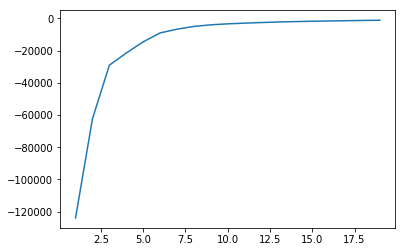

In [11]:
# calculate with different number of centroids to see the loss plot (elbow method)
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

# According to elbow method, we choose k = 6

In [12]:
# I choose 6 centroids arbitrarily and add these data to the central dataframe
kmeans6 = kmeans[5]
df['cluster'] = kmeans6.predict(data)
df['principal_feature1'] = data[0]
df['principal_feature2'] = data[1]
df['cluster'].value_counts()

4    22072
1    20470
0    17792
5      754
2      485
3      420
Name: cluster, dtype: int64

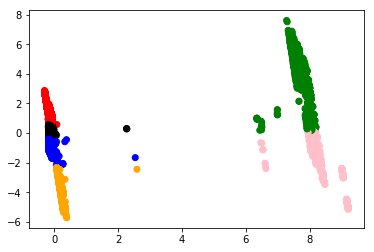

In [13]:
#plot the different clusters with the 2 main features
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["cluster"].apply(lambda x: colors[x]))
plt.show()

In [14]:
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

In [15]:
# An estimation of anomly population of the dataset (necessary for several algorithm)
outliers_fraction = 0.01
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[3])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly21 contain the anomaly result of Cluster (0:normal, 1:anomaly) 
df['anomaly21'] = (distance >= threshold).astype(int)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


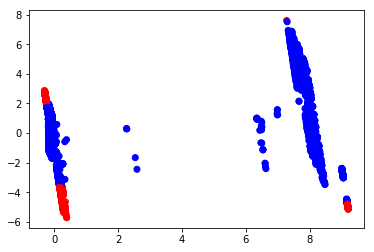

In [16]:
# visualisation of anomaly with cluster view
fig, ax = plt.subplots()
colors = {0:'blue', 1:'red', 2: 'black', 3: 'yellow'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["anomaly21"].apply(lambda x: colors[x]))
plt.show()

# Result 1: Print anomaly activities that K-Means deemed anomalous

In [17]:
res0Series = pd.Series(kmeans[6].labels_)
res0 = res0Series[res0Series.values == 1]
df.iloc[res0.index]

,id,event_timestamp,proctitle,username,exit,ppid,pid,auid,uid,gid,...,egid,sgid,fsgid,0,1,time_epoch,cluster,principal_feature1,principal_feature2,anomaly21
229,1964,2019-06-07 06:25:05+00:00,cmp -s gshadow.bak /etc/gshadow,root,0,5291,5295,0,0,0,...,0,0,0,1.0,0.0,15598887,2,7.990055,3.241222,0
230,1967,2019-06-07 06:25:05+00:00,cmp -s shadow.bak /etc/shadow,root,0,5291,5294,0,0,0,...,0,0,0,1.0,0.0,15598887,2,7.990050,3.241337,0
233,2346,2019-06-08 06:25:05+00:00,cmp -s gshadow.bak /etc/gshadow,root,0,7223,7227,0,0,0,...,0,0,0,1.0,0.0,15599751,2,8.024970,2.755535,0
234,2368,2019-06-08 06:25:05+00:00,cmp -s shadow.bak /etc/shadow,root,0,7223,7226,0,0,0,...,0,0,0,1.0,0.0,15599751,2,8.024932,2.755822,0
237,2424,2019-06-09 06:25:05+00:00,cmp -s shadow.bak /etc/shadow,root,0,8960,8963,0,0,0,...,0,0,0,1.0,0.0,15600615,2,8.056820,2.316572,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61988,373167,2020-01-06 06:25:07+00:00,cmp -s shadow.bak /etc/shadow,root,0,19096,19099,0,0,0,...,0,0,0,1.0,0.0,15782919,2,7.601184,3.083665,0
61989,373487,2020-01-07 06:25:06+00:00,cmp -s gshadow.bak /etc/gshadow,root,0,17396,17400,0,0,0,...,0,0,0,1.0,0.0,15783783,2,7.569326,3.516839,0
61990,366998,2020-01-07 06:25:06+00:00,cmp -s shadow.bak /etc/shadow,root,0,17396,17399,0,0,0,...,0,0,0,1.0,0.0,15783783,2,7.580567,3.458588,0
61991,377936,2020-01-07 06:25:07+00:00,cmp -s gshadow.bak /etc/gshadow,root,0,22951,22955,0,0,0,...,0,0,0,1.0,0.0,15783783,2,7.663910,2.150489,0


# Comment:
If we'd like to find context of one actiovity,


(1) We could list the context records of it by searching a range of "event_timestamp" in the following code.


(2) Also, we can view logs for a certain period of time in system. 
For example: sed -n '/2019-06-06 16:18:58/,/2019-06-06 16:19:51/p'  test.log
Then use grep to continue filtering based on keywords.

In [18]:
df_search = df.set_index('event_timestamp') 
df_time = df_search['2019-06-06':'2019-06-07'] 
df_time

,id,proctitle,username,exit,ppid,pid,auid,uid,gid,euid,...,egid,sgid,fsgid,0,1,time_epoch,cluster,principal_feature1,principal_feature2,anomaly21
event_timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-06 16:18:58+00:00,1927,curl --fail -sSl http%3A//169.254.169.254/late...,root,0,21831,21832,4294967295,0,0,0,...,0,0,0,1.0,0.0,15598379,3,9.154561,-4.447285,0
2019-06-06 16:19:40+00:00,1910,curl --fail -sSL http%3A//169.254.169.254/latest/,root,0,22009,22012,4294967295,0,0,0,...,0,0,0,1.0,0.0,15598379,3,9.157869,-4.492678,0
2019-06-06 16:19:46+00:00,1904,curl --fail -sSL http%3A//169.254.169.254/latest/,root,0,13671,13674,4294967295,0,0,0,...,0,0,0,1.0,0.0,15598379,3,9.004340,-2.381816,0
2019-06-06 16:19:46+00:00,1905,curl --fail -sSl http%3A//169.254.169.254/late...,root,0,13675,13676,4294967295,0,0,0,...,0,0,0,1.0,0.0,15598379,3,9.004412,-2.382643,0
2019-06-06 16:19:51+00:00,1900,curl --fail -sSl http%3A//169.254.169.254/late...,root,0,22027,22028,4294967295,0,0,0,...,0,0,0,1.0,0.0,15598379,3,9.158217,-4.497148,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-06 16:29:46+00:00,9,curl --fail -sSL http%3A//169.254.169.254/latest/,root,0,24494,24497,4294967295,0,0,0,...,0,0,0,1.0,0.0,15598385,3,9.206922,-5.138892,1
2019-06-07 06:25:05+00:00,1964,cmp -s gshadow.bak /etc/gshadow,root,0,5291,5295,0,0,0,0,...,0,0,0,1.0,0.0,15598887,2,7.990055,3.241222,0
2019-06-07 06:25:05+00:00,1967,cmp -s shadow.bak /etc/shadow,root,0,5291,5294,0,0,0,0,...,0,0,0,1.0,0.0,15598887,2,7.990050,3.241337,0


# Model 2: Train Isolation Forest to Detect Anomaly Activity

In [19]:
# train isolation forest 
model =  IsolationForest(contamination = outliers_fraction)
model.fit(data)
# add the data to the main  
df['anomaly25'] = pd.Series(model.predict(data))
df['anomaly25'] = df['anomaly25'].map( {1: 0, -1: 1} )
print(df['anomaly25'].value_counts())

0    61383
1      610
Name: anomaly25, dtype: int64


# Result 2: Print anomaly activities that Isolation Forest deemed anomalous

In [20]:
anomaly=df.loc[df['anomaly25']==1]
anomaly_index=list(anomaly.index)
print(anomaly)

           id           event_timestamp  \
0        1927 2019-06-06 16:18:58+00:00   
1        1910 2019-06-06 16:19:40+00:00   
2        1904 2019-06-06 16:19:46+00:00   
3        1905 2019-06-06 16:19:46+00:00   
4        1900 2019-06-06 16:19:51+00:00   
...       ...                       ...   
61988  373167 2020-01-06 06:25:07+00:00   
61989  373487 2020-01-07 06:25:06+00:00   
61990  366998 2020-01-07 06:25:06+00:00   
61991  377936 2020-01-07 06:25:07+00:00   
61992  377864 2020-01-07 06:25:07+00:00   

                                               proctitle username  exit  \
0      curl --fail -sSl http%3A//169.254.169.254/late...     root     0   
1      curl --fail -sSL http%3A//169.254.169.254/latest/     root     0   
2      curl --fail -sSL http%3A//169.254.169.254/latest/     root     0   
3      curl --fail -sSl http%3A//169.254.169.254/late...     root     0   
4      curl --fail -sSl http%3A//169.254.169.254/late...     root     0   
...                              

# Comment 1:
1. When the activity is identified, what types of information should be included in the alert?
Type, source, severity


2. What steps would you take to minimize false positives?
(1) We could apply Local Adaptive Multivariate Smoothing method.
(2) Parameters such as connection count, IP count, port count, and IP range can be adjusted.
(3) Apply different forms of analysis.
(4) GHSOM neural network.


3. If certain types of false positives are likely to occur, what are they?
Activities whose features are near to anomaly activity features.


4. What external data sources could you use to improve the effectiveness and accuracy of the detector?
For IP-related logs, we could use following data sources:
Where is the user based?
Are they connecting through open ports – communicating with other servers?
Are they using proxies, VPNs or TOR?
Is the IP on any spam blacklists?
Datacenter IP or residential connection (belonging to a homeowner)?


5. What types of actions should the system take in response to this detector alerting?
Automitic alerts and provide reasonable solutions. Also, it should open IPS and relevant defense mechanism.

# Added Comment 2:

1. Analyst could do following steps if they receive the alerts:
If we have more abundant data for machine learning algorithms to learn, this will be a very easy task. Because we can learn the types of threats and the corresponding solutions at the same time. When we encounter the same type or similar types of threat alerts in the future, we can let the machine learning algorithm help us directly recommend the corresponding solutions. This will reduce a lot of workload for security analysts.

But for security analysts, the general solution can be summarized as：
(1) First assessment.
(2) Response plan.
(3) Notification management.
(4) Coordinated response.
(5) Understand the need for analysis.
(6) Coordination with network maintainers.
(7) Understand business challenges.
(8) Customer management.
(9) Optimize incident response process.



2. Process of Mapping to ATT&CK
To be honest, I didn't have experience in ATT&CK framework(covers 291 technologies) before. I will learn it quickly if I am lucky to join your team! Now, I can give some my general ideas on mapping:
(1) Know yourself (threat modeling)
(2) Choose the technology you write
(3) Look at the difficulty of the attack:
(4) View data source and map to ATT&CK.
(5) Put your data together
(6) Understand the functions and limitations of different tools
(7) Maintain ATT&CK inspection life cycle



3. Identify false positive solutions
(1) Learn scripts
(2) Custom alarm threshold
(3) Outsourcing network monitoring
(4) Advanced SIEM system.
Ask question one step by one step and try to find the final decision. If we are too general about the rules, then the alarm will be triggered, accompanied by a large number of false positives, and these false positives will only lead to confusion and confusion. If we are too specific, we may miss key events that make our systems vulnerable. The key is to make an informed decision based on the data in front of us (or the faces of the game board). We started with an extensive data set, and through logic we narrowed the scope of the results.